## 1. Importando los datos.

### 1.1 Verificar que no hay problemas en la importación

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [2]:
kickstarter_2018 = pd.read_csv('../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv')

In [3]:
# set seed for reproducibility
import numpy as np
np.random.seed(0)

In [4]:
kickstarter_2018.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
338862,796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.00,2010-12-08 08:44:04,0.00,failed,0,US,0.00,0.00,10526.00
277871,483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.00,2016-01-28 04:56:18,51.00,failed,5,US,51.00,51.00,10000.00
47000,123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.00,2014-11-07 02:24:36,25.00,failed,1,US,25.00,25.00,60000.00
111338,1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.00,2012-03-15 01:16:10,585.00,successful,17,US,585.00,585.00,500.00
53743,1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.00,2016-05-27 00:07:25,25.00,failed,1,US,25.00,25.00,25000.00


In [5]:
pd.DataFrame([["ID", "No description provided", "Numeric"],
["name", "No description provided", "String"],
["category", "No description provided", "String"],
["main_category", "No description provided", "String"],
["currency", "No description provided", "String"],
["deadline", "No description provided", "DateTime"],
["goal", "Goal amount in project currency", "Numeric"],
["launched", "No description provided", "DateTime"],
["pledged", "Pledged amount in the project currency", "Numeric"],
["state", "No description provided", "String"],
["backers", "No description provided", "Numeric"],
["country", "No description provided", "String"],
["usd pledged", "Pledged amount in USD (conversion made by KS)", "Numeric"],
["usd_pledged_real", "Pledged amount in USD (conversion made by fixer.io api)", "Numeric"],
["usd_goal_real", "Goal amount in USD", "Numeric"]], columns=["Field name","Field description", "Type"])

,Field name,Field description,Type
0,ID,No description provided,Numeric
1,name,No description provided,String
2,category,No description provided,String
3,main_category,No description provided,String
4,currency,No description provided,String
5,deadline,No description provided,DateTime
6,goal,Goal amount in project currency,Numeric
7,launched,No description provided,DateTime
8,pledged,Pledged amount in the project currency,Numeric
9,state,No description provided,String


In [6]:
kickstarter_2018.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [7]:
kickstarter_2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378661.00,378661.00,378661.00,374864.00,378661.00,378661.00
mean,1074731191.99,49080.79,9682.98,105.62,7036.73,9058.92,45454.40
std,619086204.32,1183391.26,95636.01,907.19,78639.75,90973.34,1152950.06
min,5971.00,0.01,0.00,0.00,0.00,0.00,0.01
25%,538263516.00,2000.00,30.00,2.00,16.98,31.00,2000.00
50%,1075275634.00,5200.00,620.00,12.00,394.72,624.33,5500.00
75%,1610148624.00,16000.00,4076.00,56.00,3034.09,4050.00,15500.00
max,2147476221.00,100000000.00,20338986.27,219382.00,20338986.27,20338986.27,166361390.71


In [8]:
kickstarter_2018.describe(include=['object'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


In [9]:
kickstarter_2018['launched'].min()

'1970-01-01 01:00:00'

In [10]:
kickstarter_2018 = pd.read_csv('../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv', 
                               parse_dates=["deadline","launched"])
kickstarter_2018.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [11]:
kickstarter_2018.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
299667,595962034,Button Poetry Live!,Mixed Media,Art,USD,2015-09-18,10000.00,2015-08-19 19:34:20,18216.27,successful,455,US,18216.27,18216.27,10000.00
181674,1924707671,"C STREET 2012 : Tbilisi, Georgia",World Music,Music,USD,2012-06-07,5000.00,2012-05-08 18:22:59,7210.69,successful,82,US,7210.69,7210.69,5000.00
137583,1698707842,Dérive's Next Project,Punk,Music,USD,2014-07-06,1200.00,2014-06-08 17:58:37,1255.66,successful,33,US,1255.66,1255.66,1200.00
296861,581269566,Photo Book - World Santa Claus Congress,Photobooks,Photography,DKK,2017-04-14,110000.00,2017-03-14 23:45:35,462.00,failed,5,DK,0.00,66.46,15823.47
66362,1337585114,Kickstart CLE Brewing to greatness!,Drinks,Food,USD,2017-08-19,6500.00,2017-07-20 21:22:43,250.00,failed,5,US,75.00,250.00,6500.00


In [12]:
kickstarter_2018.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378657,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00
unique,nan,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,nan,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,nan,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,nan,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,1074731191.99,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40
std,619086204.32,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06
min,5971.00,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01
25%,538263516.00,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00


In [13]:
kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min()

Timedelta('17533 days 14:02:31')

### 1.2 Asegurarse de tener ids/claves únicas

In [14]:
# Chequear que no hay datos duplicados

kickstarter_2018.shape

(378661, 15)

In [15]:
# Pandas soporta índices en los dataframes, vamos a recargar los datos

kickstarter_2018 = pd.read_csv('../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv', 
                               parse_dates=["deadline","launched"], index_col=['ID'] )

In [16]:
kickstarter_2018[:5]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


In [17]:
kickstarter_2018.shape

(378661, 14)

In [18]:
# De esta forma podemos buscar el índice
kickstarter_2018.loc[999988282]

name                Nou Renmen Ayiti!  We Love Haiti!
category                              Performance Art
main_category                                     Art
currency                                          USD
deadline                          2011-08-16 00:00:00
goal                                          2000.00
launched                          2011-07-19 09:07:47
pledged                                        524.00
state                                          failed
backers                                            17
country                                            US
usd pledged                                    524.00
usd_pledged_real                               524.00
usd_goal_real                                 2000.00
Name: 999988282, dtype: object

In [19]:
# Tambien podemos verificar si hay filas de contenido duplicado

kickstarter_2018[kickstarter_2018.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


In [20]:
# Como pandas acepta valores duplicados en los índices, también debemos buscar ahí

pd.Series(kickstarter_2018.index,dtype=str).describe()

count         378661
unique        378661
top       1881211198
freq               1
Name: ID, dtype: object

#### Repasamos con un ejemplo de juguete:

In [21]:
csv='1,2\n3,3\n1,3'
print(csv)

1,2
3,3
1,3


In [22]:
from io import StringIO
df = pd.read_csv(StringIO(csv), names=['id','value'], index_col='id')
df

,value
id,
1,2
3,3
1,3


In [23]:
df[df.duplicated()]

,value
id,
1,3


In [24]:
df[df.index.duplicated(keep=False)]

,value
id,
1,2
1,3


## Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.


In [25]:
ds = pd.read_csv('../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv', 
                               parse_dates=["deadline","launched"],  index_col=['ID'])

In [26]:
ds1 = ds[ds.duplicated('name')].sort_values('name')

In [27]:
ds2= pd.DataFrame({'cantidad' : ds1.groupby(['name']).size()}).reset_index()
ds2[80:85]

,name,cantidad
80,Across The Pond,1
81,Adorable Monsters,1
82,Adrift,2
83,Adventure Box,1
84,Adventure Bunnies (Canceled),1


## 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

Hay muuuchas técnicas para despersonalizar datos.

Para ilustrar mostramos las ofrecidas por Google https://cloud.google.com/dlp/docs/transformations-reference:

* **Reemplazo**: Reemplaza cada valor de entrada con un valor determinado.
* **Ocultamiento**: Quita un valor y lo oculta.
* **Enmascaramiento con caracteres**: Enmascara una string por completo o parcialmente mediante el reemplazo de un número determinado de caracteres con un carácter fijo especificado..
* **Seudonimización mediante el reemplazo de un valor de entrada con un hash criptográfico**: Reemplaza valores de entrada con una string hexadecimal de 32 bytes mediante una clave de encriptación de datos.
* **Cambio de fechas**: Cambia las fechas por un número de días al azar, con la opción de ser coherente en el mismo contexto..
* **Seudonimización mediante el reemplazo con token de preservación de formato criptográfico**: Reemplaza un valor de entrada con un token, o valor sustituto, de la misma longitud mediante la encriptación de preservación de formato (FPE) con el modo de operación FFX. Esto permite que se use el resultado en sistemas con validación de formato o que necesitan aparecer como reales a pesar de que la información no se revela.
* **Valores de depósito con base en rangos de tamaño fijos**: Enmascara los valores de entrada y los reemplaza por depósitos, o rangos dentro de los cuales se encuentra el valor de entrada.
* **Valores de depósito con base en rangos de tamaño personalizados**: Valores de entrada de depósito con base en rangos configurables por el usuario y valores de reemplazo.
* **Extracción de datos de tiempo**: EExtrae o preserva una porción de los valores Date, Timestamp y TimeOfDay.

In [28]:
from hashlib import md5

In [29]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


kickstarter_2018['name'].apply(hashit)

ID
1000002330    a6828ae8a2eca25f0dd7035efc0af0a0
1000003930    81609b3bdc0b96f429672d69702f2524
1000004038    c12f5c3bace2f0213cdb2679a265dca0
1000007540    4dbdcf09c86bbf5683ec39bc57b77f81
1000011046    9c01404a2ef702811c2088ce139042ad
                            ...               
999976400     d89228576343394467096843057f3aa4
999977640     bbcb30bd9bd4f9bff0a96fc44d0001f0
999986353     6c3094666e1a315b6e179566fe3972d9
999987933     887be409ad8b93f26084845a41d4c178
999988282     11f7ae3385c567df409deb5f4ac9a2a5
Name: name, Length: 378661, dtype: object

## Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [30]:
hs = pd.read_csv('../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv', 
                               parse_dates=["deadline","launched"],  index_col=['ID'])

In [31]:
hs1 = hs[hs.duplicated('name')].sort_values('name')

In [32]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

hs1['name'].apply(hashit)

ID
816998285    0c7a251ffe4c7834cbc4b04906952ff1
713417995    67554ab4203d95f2f2f05365f768206e
422509694    19a82bc4c5961834282575d07d9b5f7c
866225086    b4ca2044f21f67e13ddb7583f59189a7
870322805    bed6c6cbc0540c8d40b7e2311806cc5c
                           ...               
983316237    942589616676722eaebdc3af51dbedb3
329580179    930857c212f21166427b23d4a7fe52a3
634871725                                 nan
648853978                                 nan
796533179                                 nan
Name: name, Length: 2896, dtype: object

In [33]:
hs2= pd.DataFrame({'cantidad' : hs1.groupby(['name']).size()}).reset_index()
hs2[:]

,name,cantidad
0,"""...The Last shall be first..."" LODB Lifestyle...",1
1,"""A Fresh Start""",1
2,"""American Sports Stories"" - An Athletic Quest",1
3,"""City of Mercy"" (Canceled)",1
4,"""Color"" Music Video",1
...,...,...
2223,test (Canceled),2
2224,weSTAND: A Stand With a Mission,1
2225,x,1
2226,x (Canceled),4


### 1.4 Nunca modificar los datos crudos u originales

In [34]:
kickstarter_2018.to_csv("../AnalisisYCuracion-master/output/ks-projects-201801-for-pandas.csv")

## 2. Pasos necesarios.

In [35]:
 kickstarter_2018 = pd.read_csv("../AnalisisYCuracion-master/output/ks-projects-201801-for-pandas.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'])

In [36]:
#kickstarter_2018.describe(include='all')

### 2.1 Etiquetas de variables/columnas: no usar caracteres especiales

In [37]:
# helpful character encoding module
import chardet

¿Por qué? Por que aun hay limitaciones para trabajar con estos caracteres.

¿Cúales son los caracteres "normales"? 

In [38]:
import string

string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

¿Qué es ASCII? Es una de las primeras codificaciones (o encoding) disponibles. Ver https://en.wikipedia.org/wiki/ASCII

Un encoding es un mapa de caracteres a una representación en bits (por ejemplo 1000001). ASCII es uno de los primeros estandares para interoperatividad entre computadoras (antes cada fabricante de computadora usa su propia codificación), contempla sólo los caracteres ingleses y usa 7 bits, por ejemplo *1000001* codifica el caracter *A*

Cómo sólo representaban los caracteres ingleses, empiezan a aparecer variantes para distintos idiomas, Microsoft hizo los propios para internacionalizar Windows, hubo otro estandar ISO 8859, hasta que llegó el éstandar Unicode que hizo múltiples encodings pero cada uno contempla múltiples idiomas e incluso es extensible a futuro. UTF-8 es de esos encodings el más utilizado. Ver https://en.wikipedia.org/wiki/Unicode

En particular, Python 3 utiliza UTF-8 por defecto (lo que no sucedía en Python 2).

Veamos un ejemplo práctico

In [39]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [40]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [41]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [42]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [43]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [ ]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

Este error ya lo vimos...

In [ ]:
kickstarter_2016 = pd.read_csv("../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201612.csv")

El error `UnicodeDecodeError` nos indica que el archivo no estaría en Unicode. Si no está en algún metadato o no fue indicado es dificil detectar el encoding, por suerte hay un paquete para esto en Python, que aplica unas heurísticas para detectar encoding.

Entonces le podemos indicar el encoding al leer el archivo

In [ ]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

Hay otro problema con los caracteres que es más sutíl: **[Mojibake](https://en.wikipedia.org/wiki/Mojibake)**

Sucede al leer UTF-8 como ASCII extendido (ie. `Windows-*`, `iso-8859-*` entre otros)

Ejemplo de mojibake:

In [ ]:
"cigüeña".encode('utf-8').decode('iso-8859-1')

Para esto vamos a usar un módulo específico [ftfy](https://ftfy.readthedocs.io/en/latest/). 

Que nos permite ordenar cadenas por rareza

In [ ]:
import ftfy.badness as bad

In [ ]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]

Volviendo a la consigna original, chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [ ]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

In [ ]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018[:2]

In [ ]:
kickstarter_2018.usd_pledged.head()

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [ ]:
#import ftfy.badness as bad

In [ ]:
"""
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)
"""

In [ ]:
kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1].count()

In [ ]:
raro = pd.read_csv('../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv', encoding='iso-8859-1')
raro['name_weirdness'] = raro['name'].apply(weird)
raro[raro['name_weirdness'] > 1].count()

In [ ]:
rare = pd.read_csv('../AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv')
rare['name_weirdness'] = rare['name'].str.decode(encoding='iso-8859-1').apply(weird)
rare[rare['name_weirdness'] > 1].count()

## 2.2. Tratar valores faltantes

Veamos cuantos valores nulos tenemos

In [ ]:
# get the number of missing data points per column
missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

Esta medida en sí, no dice nada más que con cuantos valores debemos lidiar. 

Primero tenemos que ver si en términos relativos su impacto.

In [ ]:
len(kickstarter_2018.dropna())/len(kickstarter_2018)

In [ ]:
len(kickstarter_2018.dropna(subset=['name']))/len(kickstarter_2018)

También debemos ver que significan en términos de representatividad e importancia de nuestro análisis.

In [ ]:
kickstarter_2018[kickstarter_2018.name.isnull()]

Ejemplo, cuantos de los proyectos suspendidos no tienen nombre

In [ ]:
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) / \
    len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

En este caso, creemos que es seguro descartar los proyectos sin nombre

In [ ]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [ ]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

In [ ]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()]

In [ ]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

Interesante, todos los datos pertenecen a un país indeterminado.

Todos los datos de ese "país" no tienen dinero prometido?

In [ ]:
kickstarter_2018[(kickstarter_2018.country == 'N,0"') & ~(kickstarter_2018.usd_pledged.isnull())].head()

A priori como los proyectos no tienen patrocinantes, completamos en 0 los valores

In [ ]:
kickstarter_2018 = kickstarter_2018.fillna(0)
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

In [ ]:
kickstarter_2018.shape

Más métodos disponibles en https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing y http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.3. Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

In [ ]:
from sklearn import preprocessing

In [ ]:
kickstarter_2018.describe(include=['O'])

In [ ]:
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

In [ ]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

In [ ]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

In [ ]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'state'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

More about preprocessing in http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [ ]:
#Estrategia 1

In [ ]:
from sklearn import preprocessing

In [ ]:
column='currency'
# Create a label (category) encoder object
cur = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
cur.fit(kickstarter_2018[column])

In [ ]:
# View encoder mapping
dict(zip(cur.classes_,cur.transform(cur.classes_)))

In [ ]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = cur.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

In [ ]:
# Reversing encoding
kickstarter_2018[column] = cur.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

In [ ]:
# Estrategia 2

In [ ]:
from sklearn.preprocessing import LabelBinarizer
column2 = 'currency'

cur2 = LabelBinarizer()

cur2_results = cur2.fit_transform(kickstarter_2018[column2])
pd.DataFrame(cur2_results, columns=((column2 + '_') + pd.Series(cur2.classes_))).head(10)

## 2.4. No cambiar los nombres de las variables de la fuente de origen

## 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad

In [ ]:
kickstarter_2018.head()

¿Hay proyectos sin patrocinadores pero con plata prometida?

In [ ]:
kickstarter_2018[(kickstarter_2018.backers == 0) & (kickstarter_2018.usd_pledged > 0)]

¿Hay proyecto no exitosos que pasaron el objetivo?

In [ ]:
kickstarter_2018[(kickstarter_2018.state != 'successful') & (kickstarter_2018.pledged > kickstarter_2018.goal)]

¿Cómo es, en promedio, la correlación entre el objetivo y la plata obtenida?

In [ ]:
df = kickstarter_2018.groupby('state')[['goal','pledged']].aggregate('mean')
df['pledged'] / df['goal']

¿Cuánta plata se obtiene en promedio por estado y categoría?

In [ ]:
kickstarter_2018.pivot_table(values='usd pledged',index='state',columns='main_category')

#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [ ]:
# Ejercicio 5.1

In [ ]:
kickstarter_2018[:1]

In [ ]:
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.usd_goal_real > kickstarter_2018.usd_pledged_real )].count()

In [ ]:
(kickstarter_2018.state == 'successful').sum()

In [ ]:
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.usd_goal_real <= kickstarter_2018.usd_pledged_real )].count()

In [ ]:
# Porcentaje exitoso y meta alcanzada:
(133951/133956)*100

In [ ]:
# Porcentaje exitoso y meta no alcanzada:
(5/133956)*100

In [ ]:
# Ejercicio 5.2

In [ ]:
kickstarter_2018[:1]

In [ ]:
tabla= pd.DataFrame({'cantidad' : kickstarter_2018.groupby(['main_category','state']).size()}).reset_index()
tabla[:10]

## 2.6. Identificar y documentar valores atípicos/outliers


Queremos analizar las características de los proyectos que obtienen dinero pero sin considerar los casos atípicos.

In [ ]:
%matplotlib inline
kickstarter_2018.usd_pledged.hist();

In [ ]:
kickstarter_2018.boxplot(column='usd pledged');

"There are many rules of thumb for how to define an outlier but there is no silver bullet. One rule of thumb is that any data point that is three standard deviations away from the mean of the same data point for all observations."

In [50]:
outliers = kickstarter_2018[kickstarter_2018.usd_pledged > (kickstarter_2018.usd_pledged.mean() + 
                                                            3 * kickstarter_2018.usd_pledged.std())]
outliers

AttributeError: 'DataFrame' object has no attribute 'usd_pledged'

In [ ]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged');

In [ ]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged',by='state');

Analizar outliers por categorías

KeyError: 'Column not found: usd_pledged'

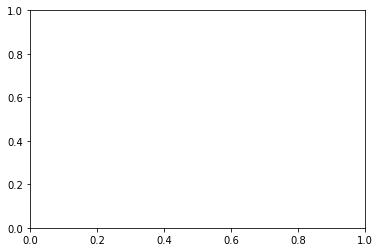

In [49]:
kickstarter_2018.boxplot(column='usd_pledged',by='state');
kickstarter_2018.boxplot(column='usd_goal_real',by='state');

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [45]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]

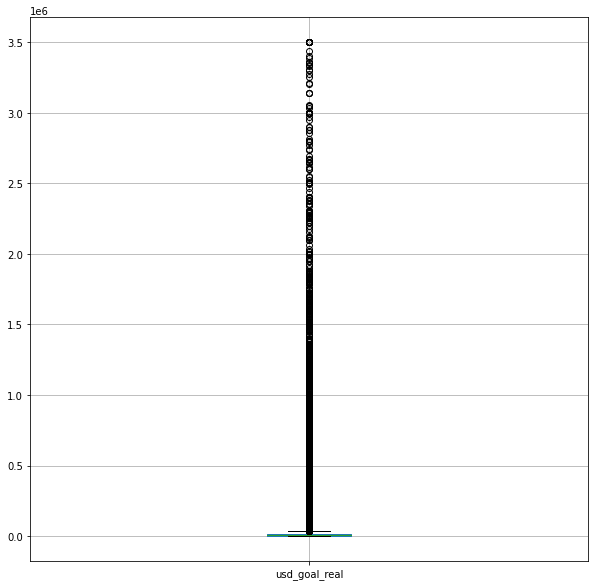

In [47]:
#Sin outliers
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real', figsize=[10,10]);

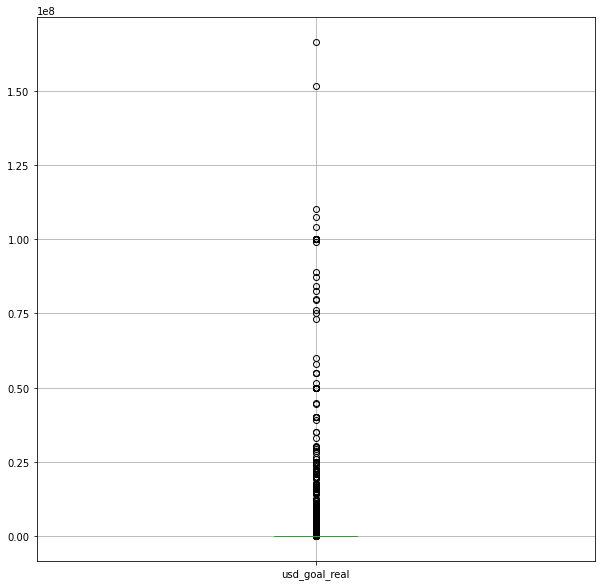

In [48]:
#Con outliers
kickstarter_2018.boxplot(column='usd_goal_real',figsize=[10,10])

## 2.7. Evaluar cómo comprimir los datos 
para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento.


## 2.8. Guardar el set de datos con un nombre informativo.


EL problema de la ingeniería de software